# Imports

In [ ]:
# !pip install --upgrade scipy
# !pip install --upgrade scikit-learn threadpoolctl

In [1]:
from utils.utils import grab_data
from utils.clustering import create_cluster_data, get_candidate_cluster_n_values, create_clusters, create_cluster_df, graph_pair_plot

# Grabbing Data

In [2]:
seasons = grab_data(by_position=True, by_player=False)

In [3]:
seasons_dict = dict()
for year, season in seasons:
    seasons_dict[year] = season

seasons_dict["2010"].keys()

dict_keys(['RB', 'WR', 'QB', 'TE'])

## QB Data

In [5]:
qbs = seasons_dict["2022"]["QB"]
qbs.sort()
qbs.reverse()

## RB Data

In [45]:
rbs = seasons_dict["2022"]["RB"]
rbs.sort()
rbs.reverse()

## WR Data

In [6]:
wrs = seasons_dict["2022"]["WR"]
wrs.sort()
wrs.reverse()

## TE Data

In [7]:
tes = seasons_dict["2022"]["TE"]
tes.sort()
tes.reverse()

# Position

In [159]:
players = rbs[:40]
position = players[0].position

# Testing Function

## Generating X

In [237]:
# for receiving stats
# stats = ["Receiving Yards", "Receptions", "Receiving TDs", "Targets"]
# stats = ["Receiving Yards Per Game", "Receptions Per Game", "Receiving TDs Per Game", "Targets Per Game"]

# for passing stats
# stats = ["Passing Yards", "Attempts", "Completions", "Passing Touchdowns", "Passing Interceptions"]
# stats = []

# for rushing stats
# stats = ["Rushing Yards", "Carries", "Yards Per Carry", "Rushing Touchdowns", "Fumbles"]
# stats = ["Rushing Yards Per Game", "Carries Per Game", "Yards Per Carry", "Rushing Touchdowns Per Game", "Fumbles Per Game"]

# rushing and receiving
# stats = ["Receiving Yards", "Receptions", "Receiving TDs", "Targets", "Rushing Yards", "Carries", "Yards Per Carry", "Rushing Touchdowns", "Fumbles"]
stats = ["Receiving Yards Per Game", "Receptions Per Game", "Receiving TDs Per Game", "Targets Per Game", 
         "Rushing Yards Per Game", "Carries Per Game", "Yards Per Carry", "Rushing Touchdowns Per Game", 
         "Fumbles Per Game"]



In [238]:
X, X_scaled = create_cluster_data(players=players, stats=stats)

In [239]:
X_scaled

array([[ 2.47678553,  3.02716305,  1.73466273,  2.77954641, -0.19272028,
        -0.23339867,  0.11653981,  1.5594914 ,  1.51833991],
       [ 2.59077308,  1.99453114,  1.73466273,  2.0451812 ,  0.53027043,
         0.39424773,  0.47208501,  0.27247408, -0.72437038],
       [ 0.54499663,  0.4925211 , -0.82044789,  0.344546  ,  2.18927588,
         1.90059911,  0.84738271,  1.30208793,  0.39698476],
       [ 0.68223164, -0.34942593, -0.82044789, -0.44537973,  2.12835423,
         2.38408298, -0.04148027,  1.76863171,  2.28927158],
       [ 0.29977343,  0.84748832, -0.82044789,  0.9919469 ,  1.35331788,
         1.48380267,  0.03752977,  0.94815817, -0.68932804],
       [-0.42089782, -0.72786205, -0.30942577, -0.69902561,  1.77613834,
         1.30433502,  1.22268042,  1.30208793, -0.72437038],
       [ 0.67098287,  1.24352612, -0.30942577,  1.2721652 ,  0.21073436,
        -0.13925171,  1.02515531, -0.4997363 ,  0.95766234],
       [ 0.51012544, -0.05019737,  0.80843513,  0.12955092,  0

## Finding Optimal N Value

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

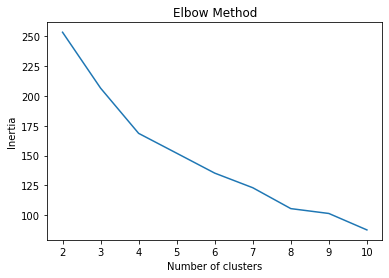

KMeans(algorithm='elkan', n_clusters=10)

In [240]:
get_candidate_cluster_n_values(X_scaled=X_scaled)

## Graph Clusters

### Cluster Size 3

In [241]:
chosen_cluster_number = 3

In [242]:
labels_3, cluster_ranking_3 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [243]:
labels_3

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2], dtype=int32)

In [244]:
cluster_ranking_3

{'Austin Ekeler': 1,
 'Christian McCaffrey': 1,
 'Josh Jacobs': 0,
 'Derrick Henry': 0,
 'Saquon Barkley': 1,
 'Nick Chubb': 0,
 'Rhamondre Stevenson': 1,
 'Tony Pollard': 1,
 'Aaron Jones': 1,
 'Joe Mixon': 1,
 'Dalvin Cook': 0,
 'Leonard Fournette': 2,
 'Jamaal Williams': 0,
 'Najee Harris': 0,
 'Miles Sanders': 0,
 'Alvin Kamara': 1,
 'Travis Etienne': 0,
 'Kenneth Walker III': 0,
 'James Conner': 1,
 'Jerick McKinnon': 2,
 "D'Andre Swift": 1,
 'Ezekiel Elliott': 0,
 'Devin Singletary': 0,
 'David Montgomery': 0,
 'Raheem Mostert': 0,
 'AJ Dillon': 0,
 'Dameon Pierce': 0,
 'Antonio Gibson': 2,
 'Tyler Allgeier': 0,
 'Jeff Wilson': 0,
 'Cordarrelle Patterson': 0,
 'Latavius Murray': 0,
 'Jonathan Taylor': 0,
 'Samaje Perine': 2,
 'Cam Akers': 0,
 'Rachaad White': 2,
 'Isiah Pacheco': 0,
 "D'Onta Foreman": 0,
 'Kareem Hunt': 2,
 'Michael Carter': 2}

### Cluster Size 4

In [245]:
chosen_cluster_number = 4

In [246]:
labels_4, cluster_ranking_4 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [247]:
labels_4

array([1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 3, 0, 2, 0, 1, 2, 0, 2, 3, 1, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 3, 3], dtype=int32)

In [248]:
cluster_ranking_4

{'Austin Ekeler': 1,
 'Christian McCaffrey': 1,
 'Josh Jacobs': 2,
 'Derrick Henry': 2,
 'Saquon Barkley': 2,
 'Nick Chubb': 0,
 'Rhamondre Stevenson': 1,
 'Tony Pollard': 0,
 'Aaron Jones': 1,
 'Joe Mixon': 1,
 'Dalvin Cook': 2,
 'Leonard Fournette': 3,
 'Jamaal Williams': 0,
 'Najee Harris': 2,
 'Miles Sanders': 0,
 'Alvin Kamara': 1,
 'Travis Etienne': 2,
 'Kenneth Walker III': 0,
 'James Conner': 2,
 'Jerick McKinnon': 3,
 "D'Andre Swift": 1,
 'Ezekiel Elliott': 0,
 'Devin Singletary': 0,
 'David Montgomery': 0,
 'Raheem Mostert': 0,
 'AJ Dillon': 0,
 'Dameon Pierce': 2,
 'Antonio Gibson': 3,
 'Tyler Allgeier': 0,
 'Jeff Wilson': 0,
 'Cordarrelle Patterson': 0,
 'Latavius Murray': 0,
 'Jonathan Taylor': 2,
 'Samaje Perine': 3,
 'Cam Akers': 0,
 'Rachaad White': 3,
 'Isiah Pacheco': 0,
 "D'Onta Foreman": 0,
 'Kareem Hunt': 3,
 'Michael Carter': 3}

### Cluster Size 5

In [249]:
chosen_cluster_number = 5

In [250]:
labels_5, cluster_ranking_5 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [251]:
labels_5

array([1, 1, 0, 0, 0, 3, 2, 2, 2, 1, 0, 1, 3, 0, 3, 1, 2, 3, 0, 4, 2, 3,
       2, 3, 2, 3, 0, 4, 3, 3, 3, 3, 0, 4, 3, 4, 3, 3, 4, 4], dtype=int32)

In [252]:
cluster_ranking_5

{'Austin Ekeler': 1,
 'Christian McCaffrey': 1,
 'Josh Jacobs': 0,
 'Derrick Henry': 0,
 'Saquon Barkley': 0,
 'Nick Chubb': 3,
 'Rhamondre Stevenson': 2,
 'Tony Pollard': 2,
 'Aaron Jones': 2,
 'Joe Mixon': 1,
 'Dalvin Cook': 0,
 'Leonard Fournette': 1,
 'Jamaal Williams': 3,
 'Najee Harris': 0,
 'Miles Sanders': 3,
 'Alvin Kamara': 1,
 'Travis Etienne': 2,
 'Kenneth Walker III': 3,
 'James Conner': 0,
 'Jerick McKinnon': 4,
 "D'Andre Swift": 2,
 'Ezekiel Elliott': 3,
 'Devin Singletary': 2,
 'David Montgomery': 3,
 'Raheem Mostert': 2,
 'AJ Dillon': 3,
 'Dameon Pierce': 0,
 'Antonio Gibson': 4,
 'Tyler Allgeier': 3,
 'Jeff Wilson': 3,
 'Cordarrelle Patterson': 3,
 'Latavius Murray': 3,
 'Jonathan Taylor': 0,
 'Samaje Perine': 4,
 'Cam Akers': 3,
 'Rachaad White': 4,
 'Isiah Pacheco': 3,
 "D'Onta Foreman": 3,
 'Kareem Hunt': 4,
 'Michael Carter': 4}

### Cluster 6 Size

In [253]:
chosen_cluster_number = 6

In [254]:
labels_6, cluster_ranking_6 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [255]:
labels_6

array([1, 1, 0, 0, 0, 4, 3, 3, 3, 1, 0, 1, 4, 0, 4, 1, 0, 4, 0, 3, 3, 4,
       5, 2, 5, 5, 0, 2, 5, 5, 5, 5, 0, 2, 5, 2, 5, 5, 2, 2], dtype=int32)

In [256]:
cluster_ranking_6

{'Austin Ekeler': 1,
 'Christian McCaffrey': 1,
 'Josh Jacobs': 0,
 'Derrick Henry': 0,
 'Saquon Barkley': 0,
 'Nick Chubb': 4,
 'Rhamondre Stevenson': 3,
 'Tony Pollard': 3,
 'Aaron Jones': 3,
 'Joe Mixon': 1,
 'Dalvin Cook': 0,
 'Leonard Fournette': 1,
 'Jamaal Williams': 4,
 'Najee Harris': 0,
 'Miles Sanders': 4,
 'Alvin Kamara': 1,
 'Travis Etienne': 0,
 'Kenneth Walker III': 4,
 'James Conner': 0,
 'Jerick McKinnon': 3,
 "D'Andre Swift": 3,
 'Ezekiel Elliott': 4,
 'Devin Singletary': 5,
 'David Montgomery': 2,
 'Raheem Mostert': 5,
 'AJ Dillon': 5,
 'Dameon Pierce': 0,
 'Antonio Gibson': 2,
 'Tyler Allgeier': 5,
 'Jeff Wilson': 5,
 'Cordarrelle Patterson': 5,
 'Latavius Murray': 5,
 'Jonathan Taylor': 0,
 'Samaje Perine': 2,
 'Cam Akers': 5,
 'Rachaad White': 2,
 'Isiah Pacheco': 5,
 "D'Onta Foreman": 5,
 'Kareem Hunt': 2,
 'Michael Carter': 2}

### Cluster 7 Size

In [257]:
chosen_cluster_number = 7

In [258]:
labels_7, cluster_ranking_7 = create_clusters(cluster_num=chosen_cluster_number, X_scaled=X_scaled, players=players)

/Users/alexbishka/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [259]:
labels_7

array([6, 6, 2, 2, 2, 2, 3, 0, 3, 6, 3, 6, 2, 3, 5, 3, 3, 5, 3, 4, 0, 5,
       3, 1, 5, 5, 3, 1, 5, 5, 5, 5, 3, 4, 5, 1, 5, 5, 1, 1], dtype=int32)

In [260]:
cluster_ranking_7

{'Austin Ekeler': 6,
 'Christian McCaffrey': 6,
 'Josh Jacobs': 2,
 'Derrick Henry': 2,
 'Saquon Barkley': 2,
 'Nick Chubb': 2,
 'Rhamondre Stevenson': 3,
 'Tony Pollard': 0,
 'Aaron Jones': 3,
 'Joe Mixon': 6,
 'Dalvin Cook': 3,
 'Leonard Fournette': 6,
 'Jamaal Williams': 2,
 'Najee Harris': 3,
 'Miles Sanders': 5,
 'Alvin Kamara': 3,
 'Travis Etienne': 3,
 'Kenneth Walker III': 5,
 'James Conner': 3,
 'Jerick McKinnon': 4,
 "D'Andre Swift": 0,
 'Ezekiel Elliott': 5,
 'Devin Singletary': 3,
 'David Montgomery': 1,
 'Raheem Mostert': 5,
 'AJ Dillon': 5,
 'Dameon Pierce': 3,
 'Antonio Gibson': 1,
 'Tyler Allgeier': 5,
 'Jeff Wilson': 5,
 'Cordarrelle Patterson': 5,
 'Latavius Murray': 5,
 'Jonathan Taylor': 3,
 'Samaje Perine': 4,
 'Cam Akers': 5,
 'Rachaad White': 1,
 'Isiah Pacheco': 5,
 "D'Onta Foreman": 5,
 'Kareem Hunt': 1,
 'Michael Carter': 1}

# Graphing Clusters

In [261]:
suffix = "v2-per-game"

### 3 Clusters

In [262]:
df_3 = create_cluster_df(labels=labels_3, X=X, stats=stats)

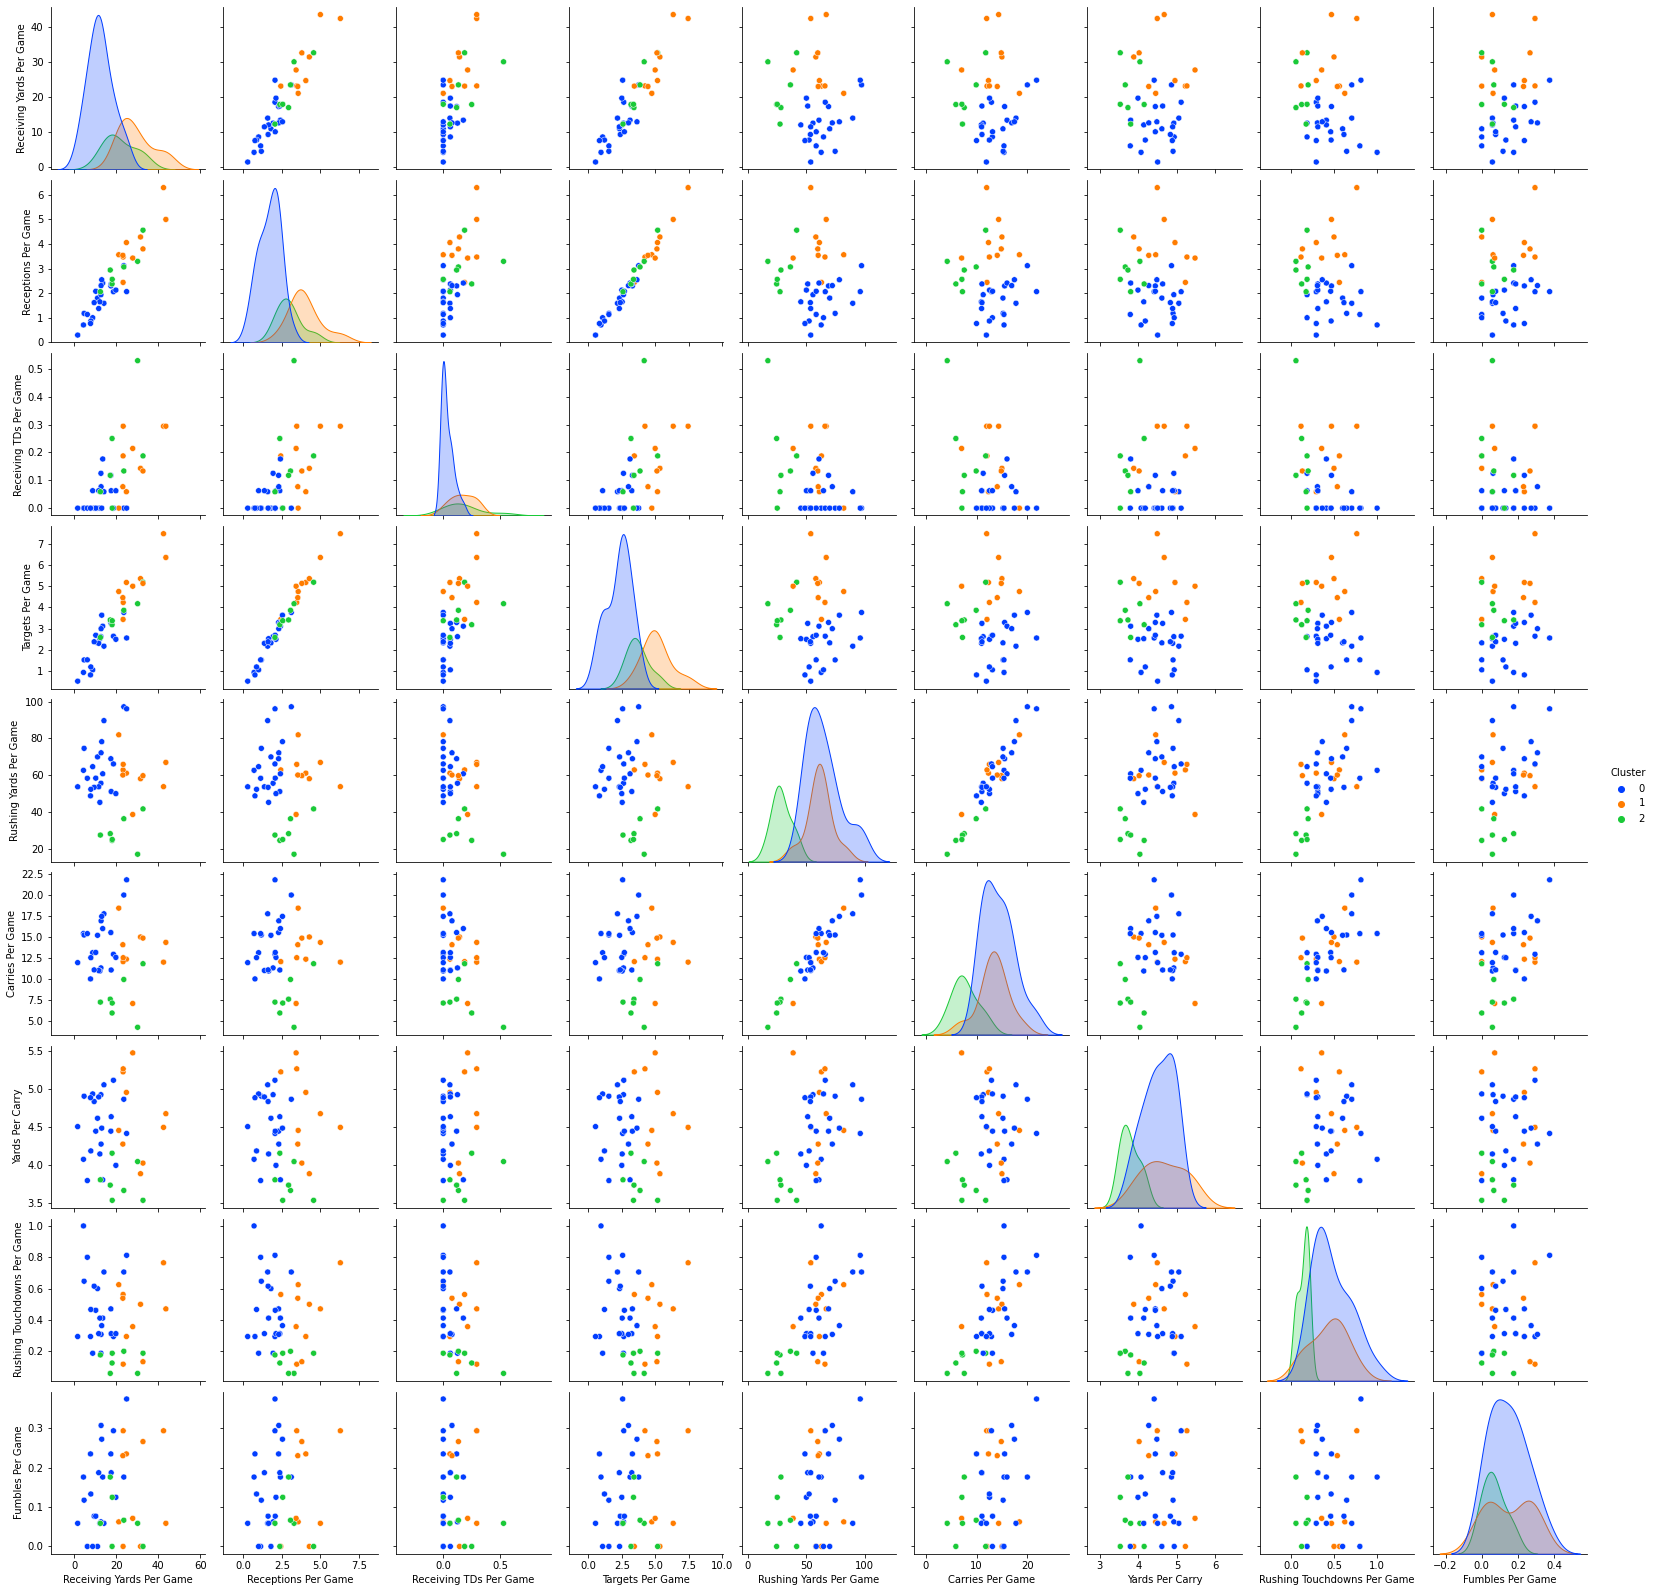

In [263]:
graph_pair_plot(df=df_3, position=position, stats=stats, save_suffix=suffix)

### 4 Clusters

In [264]:
df_4 = create_cluster_df(labels=labels_4, X=X, stats=stats)

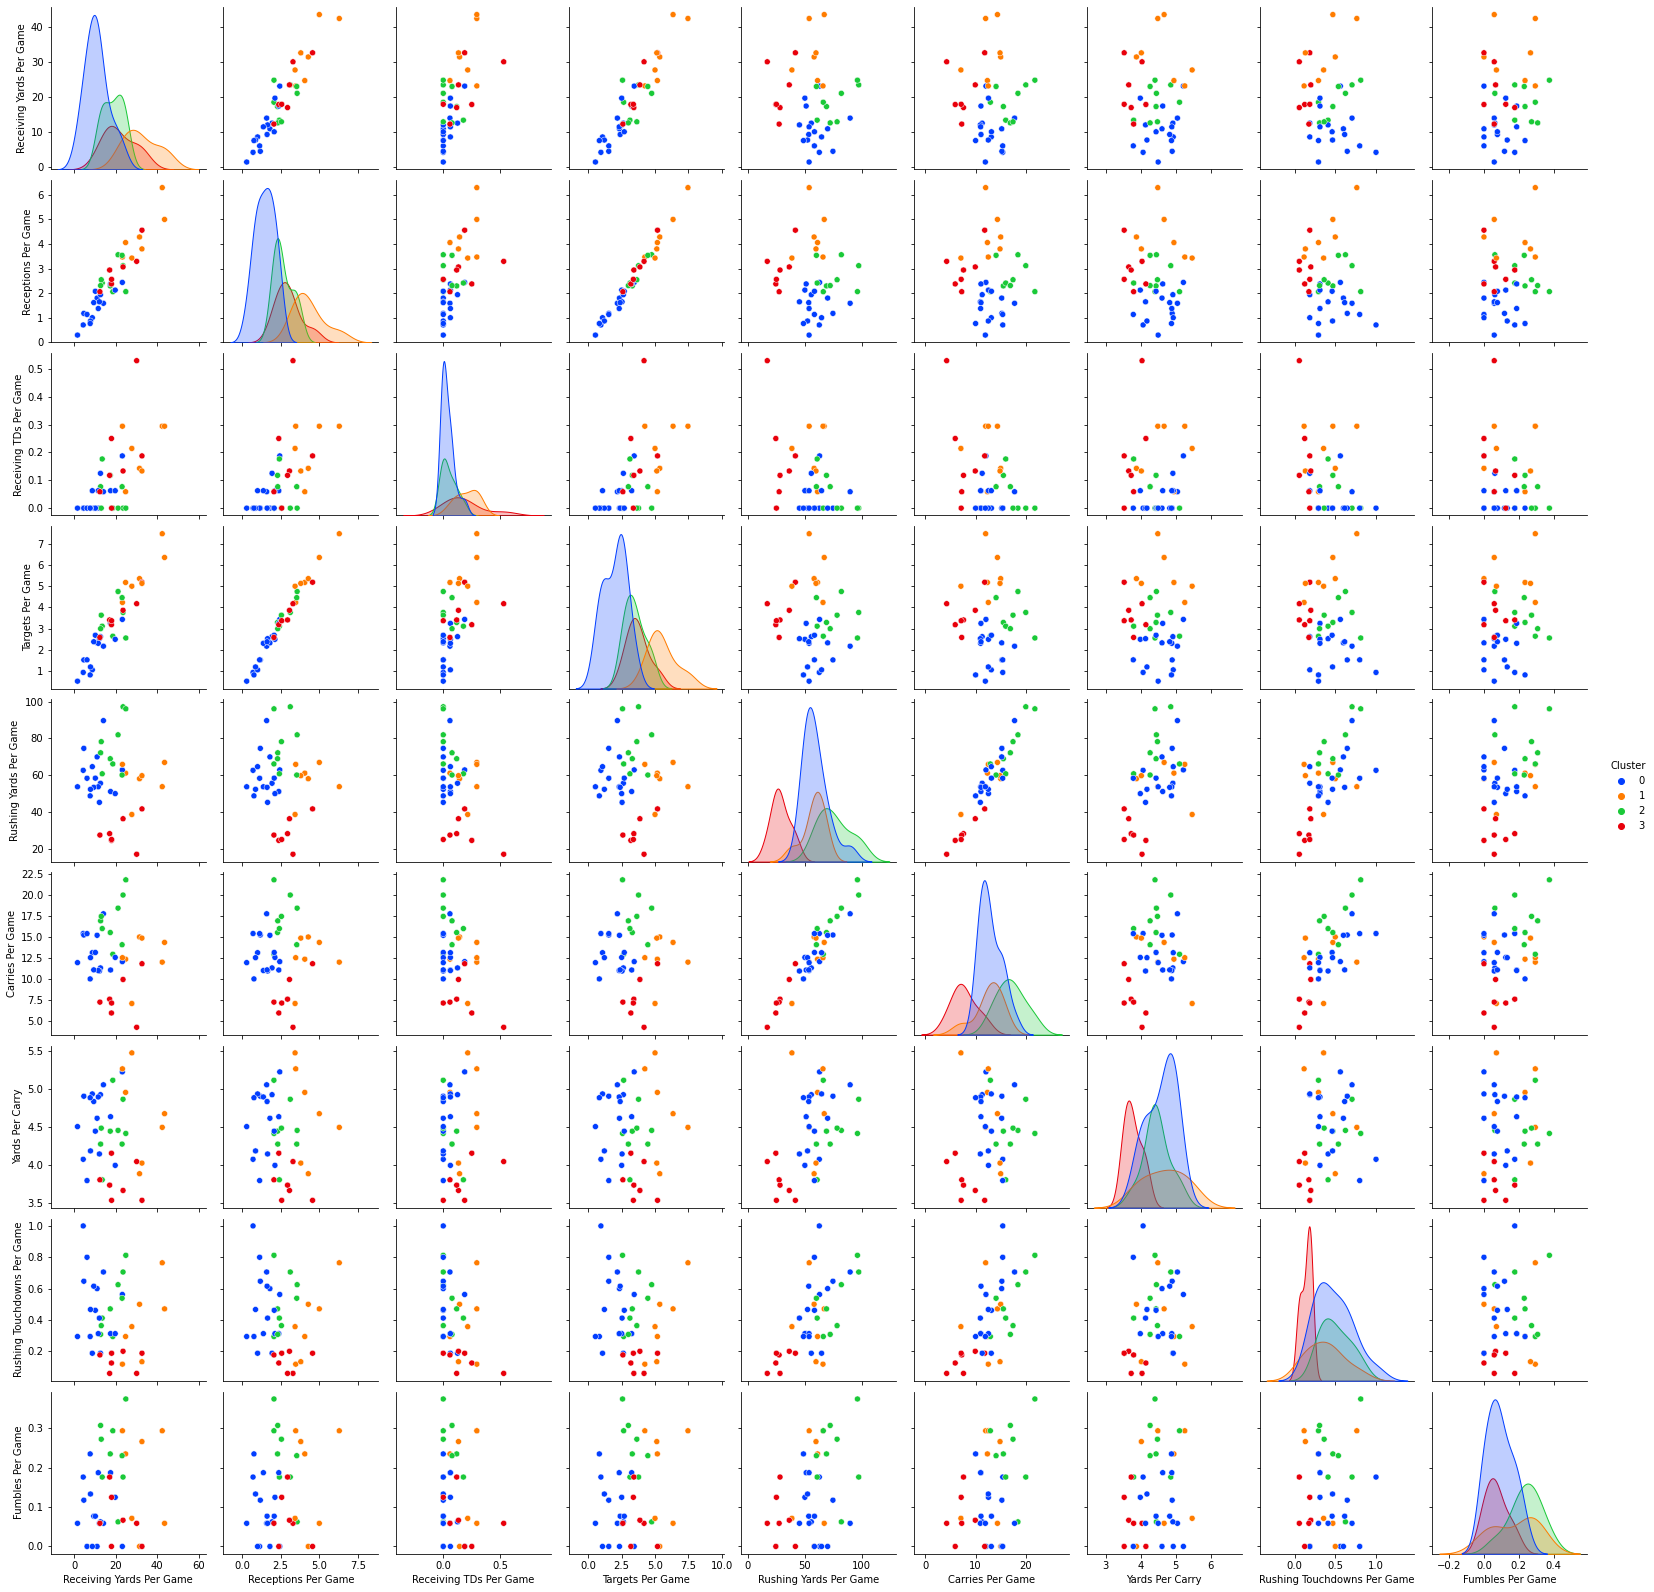

In [265]:
graph_pair_plot(df=df_4, position=position, stats=stats, save_suffix=suffix)

### 5 Clusters

In [266]:
df_5 = create_cluster_df(labels=labels_5, X=X, stats=stats)

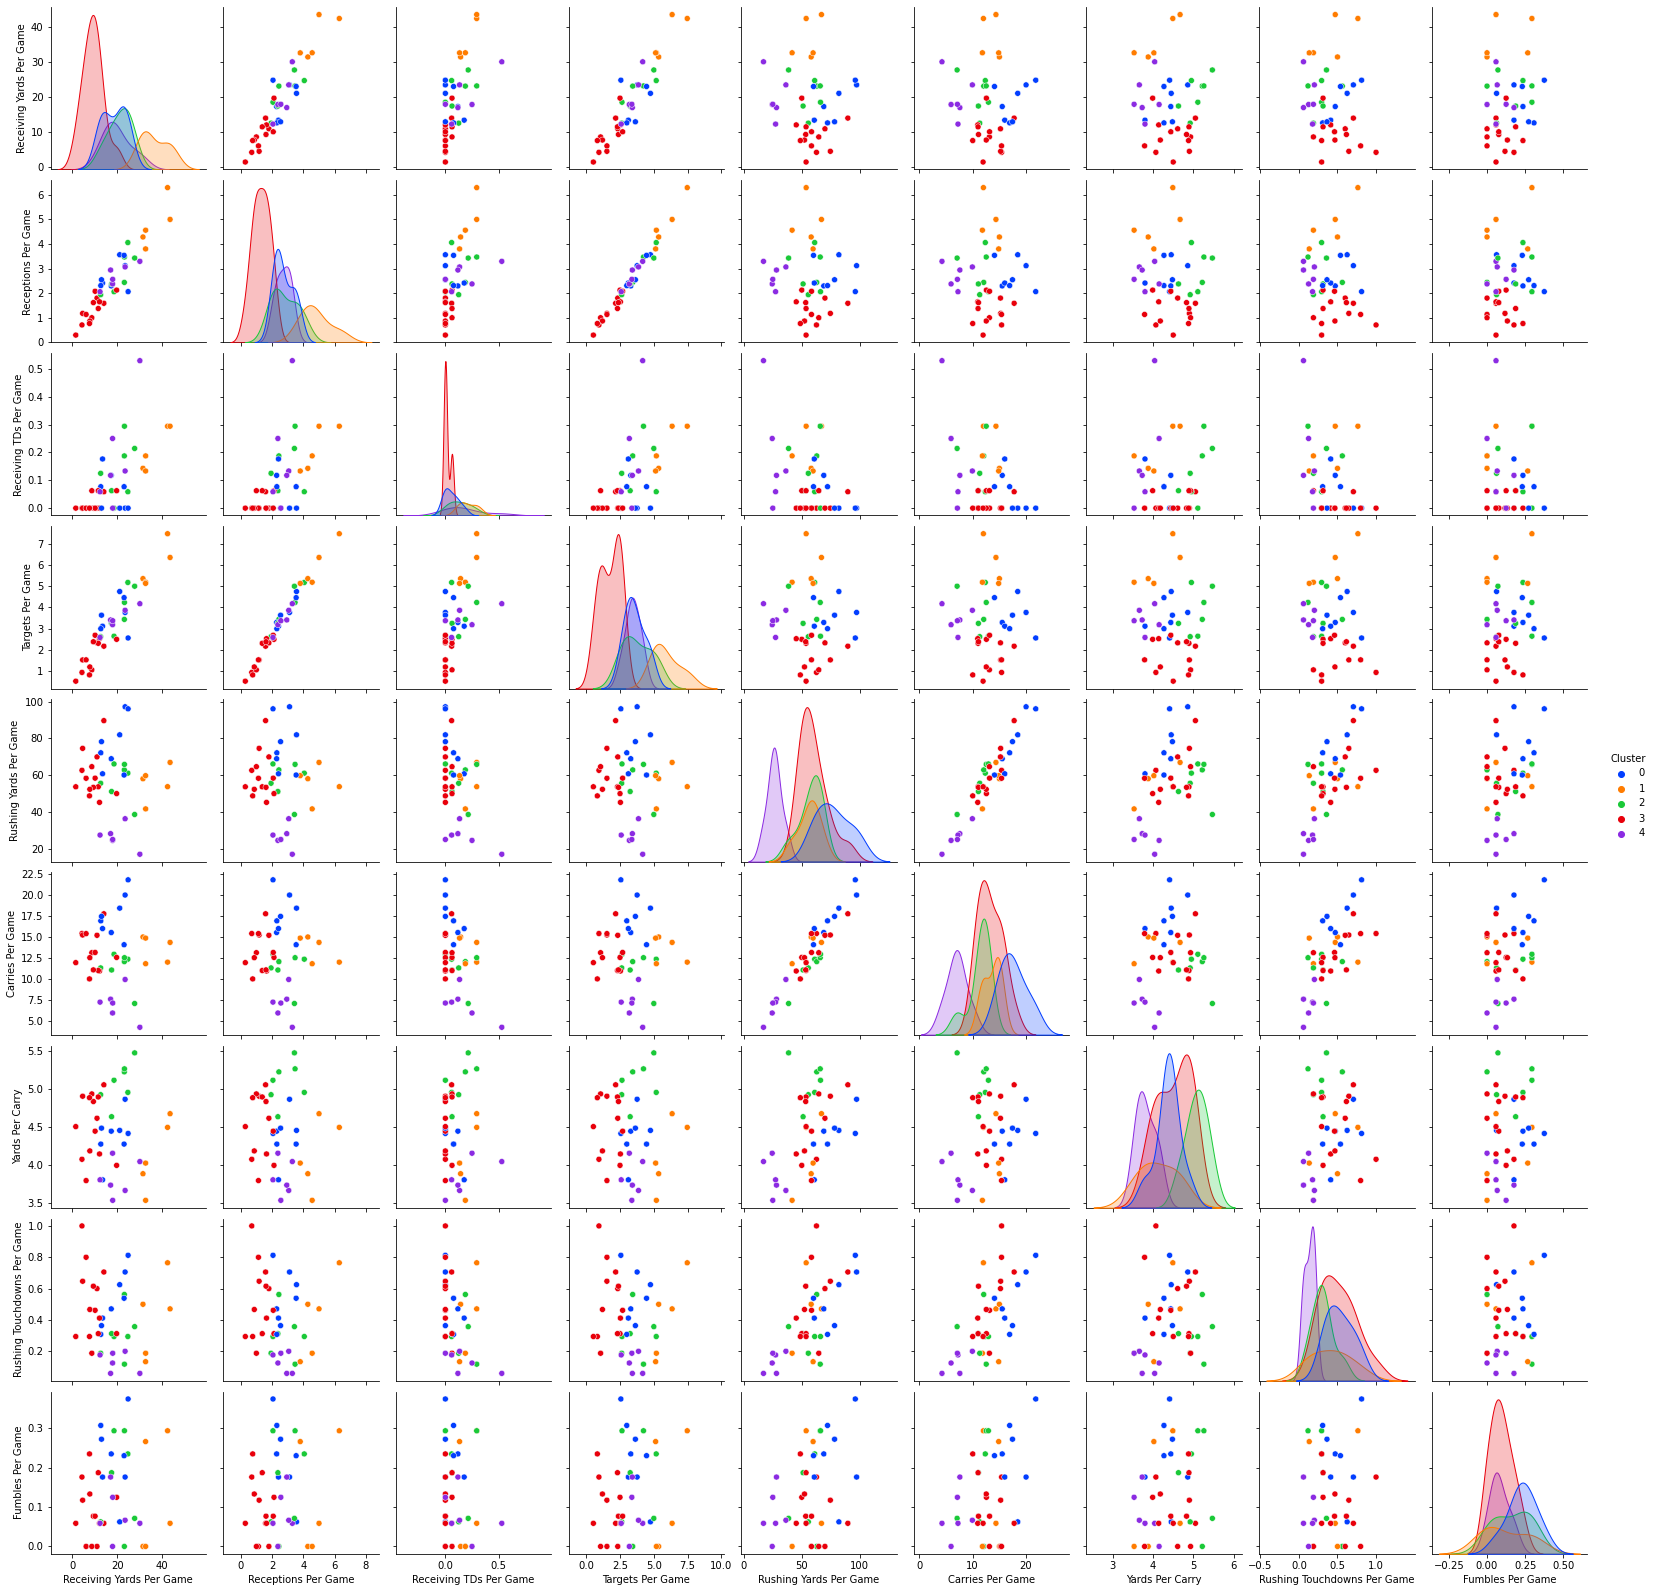

In [267]:
graph_pair_plot(df=df_5, position=position, stats=stats, save_suffix=suffix)

### 6 Clusters

In [268]:
df_6 = create_cluster_df(labels=labels_6, X=X, stats=stats)

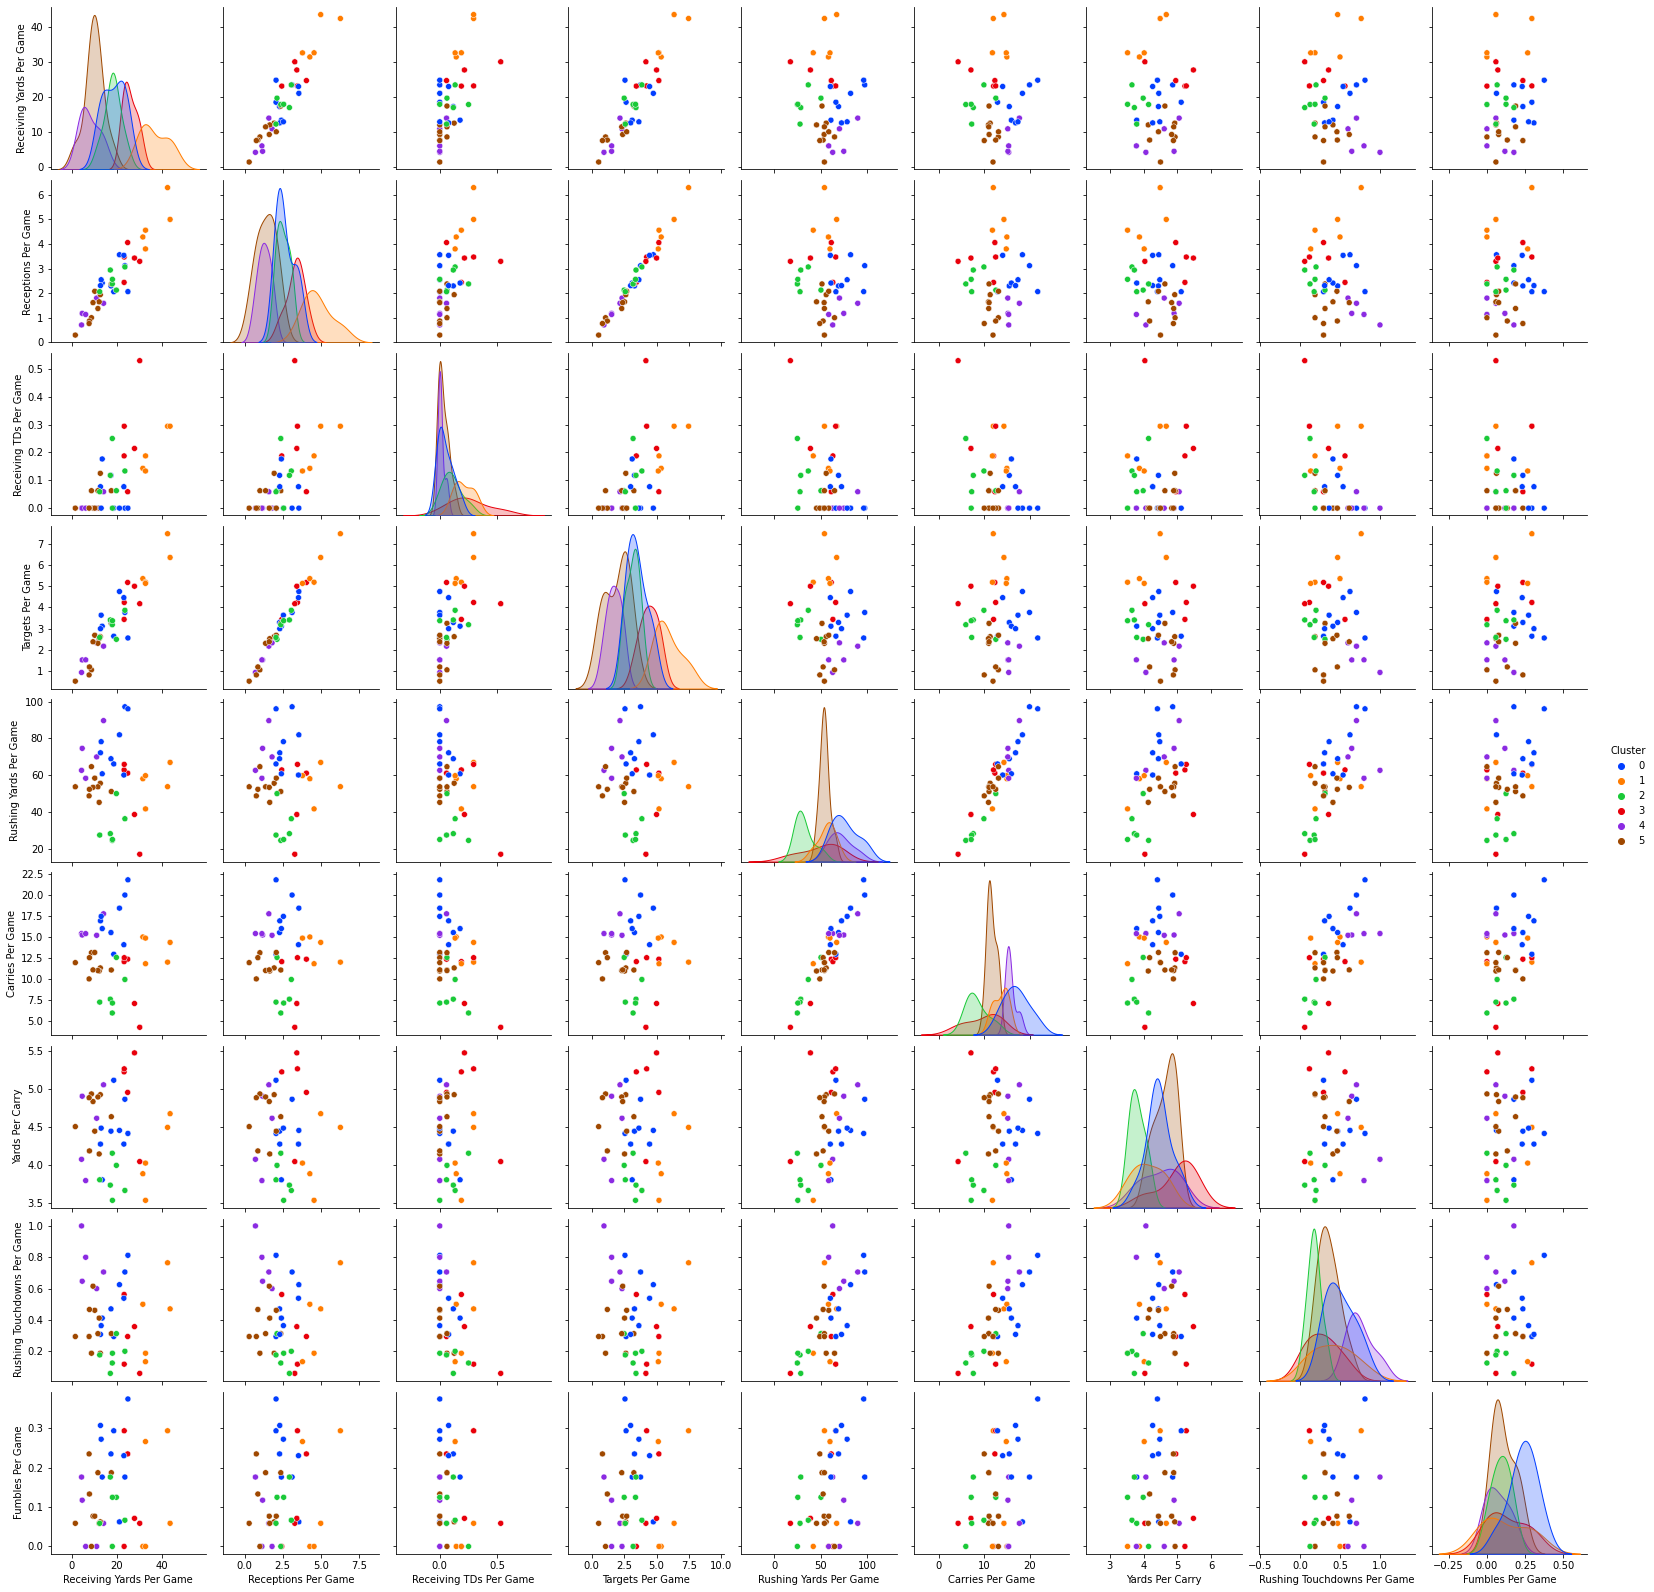

In [269]:
graph_pair_plot(df=df_6, position=position, stats=stats, save_suffix=suffix)

### 7 Clusters

In [270]:
df_7 = create_cluster_df(labels=labels_7, X=X, stats=stats)

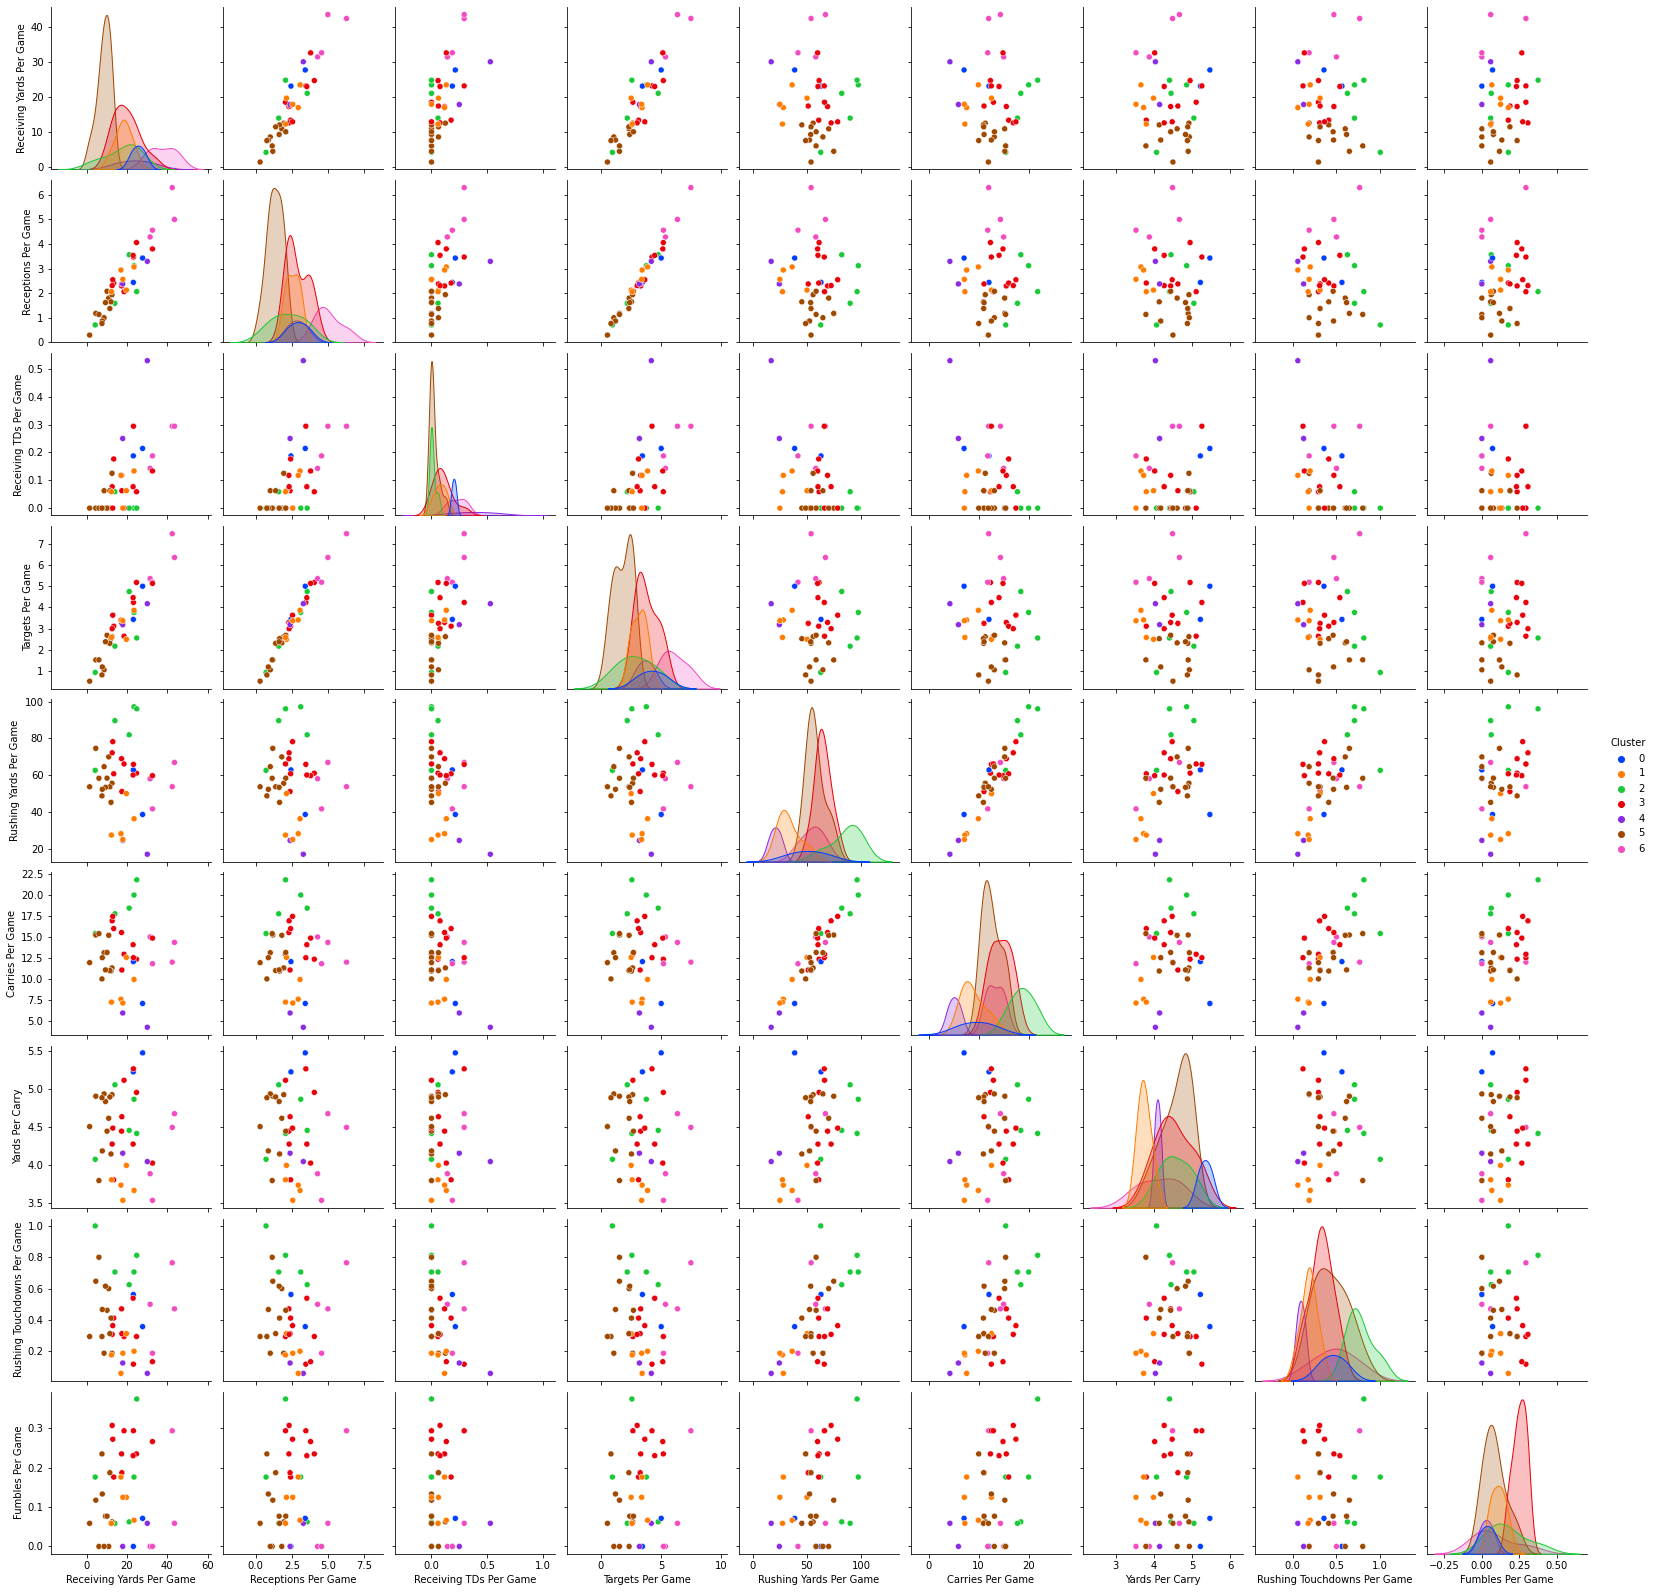

In [271]:
graph_pair_plot(df=df_7, position=position, stats=stats, save_suffix=suffix)

In [272]:
cluster_ranking_7

{'Austin Ekeler': 6,
 'Christian McCaffrey': 6,
 'Josh Jacobs': 2,
 'Derrick Henry': 2,
 'Saquon Barkley': 2,
 'Nick Chubb': 2,
 'Rhamondre Stevenson': 3,
 'Tony Pollard': 0,
 'Aaron Jones': 3,
 'Joe Mixon': 6,
 'Dalvin Cook': 3,
 'Leonard Fournette': 6,
 'Jamaal Williams': 2,
 'Najee Harris': 3,
 'Miles Sanders': 5,
 'Alvin Kamara': 3,
 'Travis Etienne': 3,
 'Kenneth Walker III': 5,
 'James Conner': 3,
 'Jerick McKinnon': 4,
 "D'Andre Swift": 0,
 'Ezekiel Elliott': 5,
 'Devin Singletary': 3,
 'David Montgomery': 1,
 'Raheem Mostert': 5,
 'AJ Dillon': 5,
 'Dameon Pierce': 3,
 'Antonio Gibson': 1,
 'Tyler Allgeier': 5,
 'Jeff Wilson': 5,
 'Cordarrelle Patterson': 5,
 'Latavius Murray': 5,
 'Jonathan Taylor': 3,
 'Samaje Perine': 4,
 'Cam Akers': 5,
 'Rachaad White': 1,
 'Isiah Pacheco': 5,
 "D'Onta Foreman": 5,
 'Kareem Hunt': 1,
 'Michael Carter': 1}